In [22]:
from requests import get
from bs4 import BeautifulSoup

In [23]:
url = 'https://www.imdb.com/search/title?title_type=feature&release_date=2000-01-01,2017-12-31&countries=in&languages=hi&sort=user_rating,desc&count=250'

In [24]:
response = get(url)
response

<Response [200]>

In [25]:
html_soup = BeautifulSoup(response.text, 'lxml')

In [26]:
type(html_soup)

bs4.BeautifulSoup

In [27]:
movie_containers = html_soup.find_all('div',class_ = 'lister-item mode-advanced')

In [28]:
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
250


In [29]:

first_movie = movie_containers[0]
first_name = first_movie.h3.a.text
print(first_name)

Zakir Khan Live


In [30]:

first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year = first_year.text
print(first_year)

(2017)


In [31]:
first_imdb = float(first_movie.strong.text)
print(first_imdb)

9.2


In [32]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
print(first_votes['data-value'])

10


In [34]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
votes = []

# Extract data from individual movie container
for container in movie_containers:

        # The name
    name = container.h3.a.text
    names.append(name)

        # The year
    year = container.h3.find('span', class_ = 'lister-item-year').text
    years.append(year)

        # The IMDB rating
    imdb = float(container.strong.text)
    imdb_ratings.append(imdb)

        # The number of votes
    vote = container.find('span', attrs = {'name':'nv'})['data-value']
    votes.append(int(vote))


In [35]:

import pandas as pd

test_df = pd.DataFrame({'movie': names,
                       'year': years,
                       'imdb': imdb_ratings,
                       'votes': votes})
print(test_df.info())
print(test_df)
test_df.to_csv('movie.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
movie    250 non-null object
year     250 non-null object
imdb     250 non-null float64
votes    250 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.9+ KB
None
                                            movie        year  imdb  votes
0                                 Zakir Khan Live      (2017)   9.2     10
1                              Mahakali Ka Insaaf      (2001)   9.2     71
2    Main Tumhare Bachche ki Maa Banne Waali Hoon      (2017)   9.1     31
3                         Man on Mission Taqatwar      (2005)   9.1     64
4                 Main Hoon Khiladiyon Ka Khiladi      (2004)   9.1     72
5                         Dilwale:The Brave Heart      (2001)   9.0     92
6                     Run Bhoomi Champs Don't Cry      (2015)   9.0      5
7                                             Dhh      (2017)   8.9     44
8                         Jhansi Ki Ra

In [36]:
#web scraping for table
import requests
import lxml.html as lh
import pandas as pd

#url='http://www.indianmoviebiz.com/hindi-box-office-2018/'
url='http://www.indianmoviebiz.com/hindi-box-ofice-2017/'
#url='http://www.indianmoviebiz.com/hindi-boxoffice-2016/'
#url='http://www.indianmoviebiz.com/hindi-boxoffice-2015/'
#url='http://www.indianmoviebiz.com/hindi-boxoffice-2014/'
#url='http://www.indianmoviebiz.com/hindi-boxoffice-2013-2/'
#url='http://www.indianmoviebiz.com/hindi-box-office-2012/'

#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

#Check the length of the first 12 rows
print([len(T) for T in tr_elements[:12]])

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [37]:
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    #print ('%d:"%s"'%(i,name))
    col.append((name,[]))

#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 4, the //tr data is not from our table 
    if len(T)!=4:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1
print([len(C) for (title,C) in col])

[51, 51, 51, 51]


In [38]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)
del df['ww share']
df.columns=['MOVIE','Earnings','Budget']
#df['VERDICT'] = pd.Series((df['Earnings'].values > df['Budget'].values)=='Hit',index=df.index)

#prbint(df.head(51))

In [39]:
#df.head(51)

In [40]:
df.Budget = pd.Index(map(lambda x : str(x)[:-2], df.Budget))

In [41]:
df.head()

,MOVIE,Earnings,Budget
0,Tiger zinda hai,580cr,200
1,Fukrey returns,125cr,15
2,Firangi,15cr,15
3,julie2,7cr,5
4,Tumhari sulu,45cr,15


In [42]:
#df.Earnings = pd.Index(map(lambda x : str(x)[:-2], df.Earning
df.Earnings = df.Earnings.astype(str)

In [43]:
df.Budget = df.Budget.astype(int)        

In [44]:
df.Earnings = df.Earnings.replace('cr$','',regex = True)

In [45]:
df.head(51)

,MOVIE,Earnings,Budget
0,Tiger zinda hai,580,200
1,Fukrey returns,125,15
2,Firangi,15,15
3,julie2,7,5
4,Tumhari sulu,45,15
5,Aksar2,7,10
6,Shadhi mein zaroor aana,12,10
7,Quarib quarib single,18,10
8,Ittefaq,50,25
9,Golmal4,305,80


In [46]:
df.head(51).to_csv('18.csv',index=False)

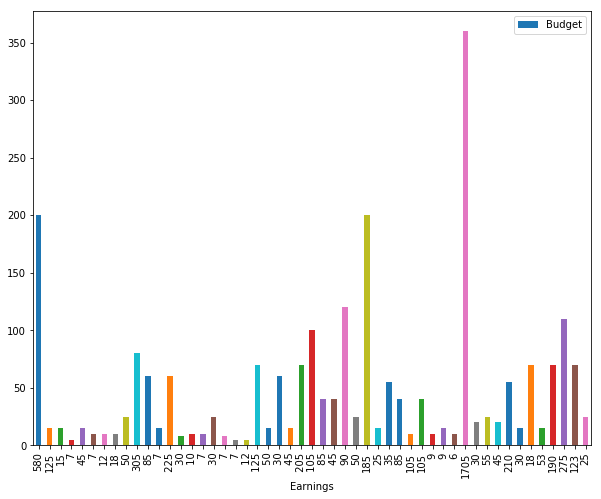

In [48]:
import matplotlib.pyplot as plt
df.plot(x='Earnings', y='Budget', kind='bar',figsize=(10,8)) 
plt.show()

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
data = pd.read_csv('movies.csv')

data.movie = data.movie.astype(str)


In [75]:
data['Weight Rating'].describe()

count    2501.000000
mean     1542.227420
std      2304.176016
min         3.630591
25%        41.719240
50%       305.431751
75%      2106.749237
max      8720.931432
Name: Weight Rating, dtype: float64

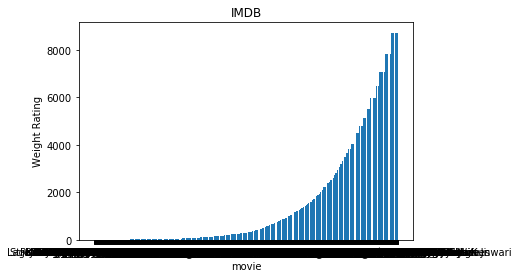

In [64]:
plt.bar(data['movie'], data['Weight Rating'])


#labels
plt.xlabel("movie")
plt.ylabel("Weight Rating")

# add legend
#plt.legend()

#title
plt.title("IMDB")

#show plot
plt.show()

In [96]:
import numpy as np

In [97]:
data['Verdict'] = np.where(data['Weight Rating'] > 1500 , 'flop', 'hit')


In [101]:
data.head()

,movie,year,imdb,votes,Weight Rating,Verdict
0,Slumdog Millionaire,2008.0,8.0,722366,3.630591,hit
1,3 Idiots,2009.0,8.4,281737,3.684223,hit
2,Taare Zameen Par,2007.0,8.4,129524,3.805387,hit
3,PK,2014.0,8.2,127330,3.809604,hit
4,Dangal,2016.0,8.5,104851,3.864717,hit


In [107]:
x = data.iloc[:,2:5].values
y = data.iloc[:,5].values


In [110]:
from sklearn.model_selection import train_test_splittest_split

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [112]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

classifier.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [117]:
y_pred = classifier.predict(x_test)

#y_pred

In [129]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train

x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min() - 1, stop = x_set[:,0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:,1].min() - 1, stop = x_set[:,1].max() + 1, step = 0.01))


plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, 
            cmap = ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())



MemoryError: 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


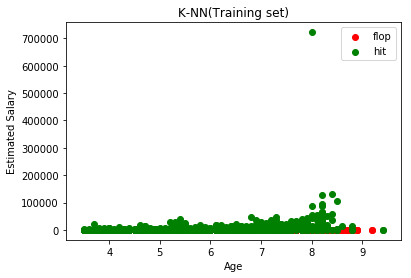

In [130]:
for i,j in enumerate(np.unique(y_set)):
    
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1],
               c = ListedColormap(('red',"green"))(i), label = j)
    

plt.title("K-NN(Training set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()